# Building Histograms

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import datetime

In [4]:
import DailyEtapasBuilder

#### Running the builder of the dataframe for date = 2017-03-15

In [5]:
date = '2017-03-15' #First date, Wednesday
#Creating the object.
etapas_builder = DailyEtapasBuilder.RunSilentlyDailyEtapasBuilderClass(date)
#Building.
etapas_builder.loadSimplifiedEtapas()
etapas_builder.cleanDataFrame() #Be aware of this condition
etapas_builder.mergeTurnstileData()
etapas_builder.sortDataFrame()
etapas_builder.postProcessingSortedDataFrame()
#Retrieving the info.
etapas_df = etapas_builder.etapas_df
filtered_df = etapas_builder.filteringDf()[0]

TODO: Currently, there are rows with extremely high values for the 'diferencia_tiempo' attribute (e.g. >=25 mins). <strong>Be aware of this</strong>. <strike>This should be fixed considering the idExpedicion attribute present in the corresponding 'perfiles' database. The following graphs and descriptive statistics consider only the 95th percentile for the 'diferencia_tiempo_secs' attribute.</strike>

Filtering by diferencia_tiempo<=97th percentile in the <strong>whole</strong> databases. <font color="red"><strong>BE AWARE.</strong></font>

In [6]:
percentil_97 = filtered_df['diferencia_tiempo'].quantile(0.97)
print ('Percentile 97th for database is: ' + str(percentil_97))
percentil_97_df = filtered_df[filtered_df['diferencia_tiempo']<=percentil_97]

Percentile 97th for database is: 0 days 00:00:25


In [7]:
turnstile_97_df = percentil_97_df[percentil_97_df['torniquete_mariposa']==1]
no_turnstile_97_df = percentil_97_df[percentil_97_df['no_torniquete']==1]

In [8]:
turnstile_97_df.describe().round(3)

,id,nviaje,torniquete_mariposa,no_torniquete,diferencia_tiempo,diferencia_tiempo_secs
count,1.022250e+05,102225.000,102225.0,102225.0,102225,102225.000
mean,2.197905e+09,1.621,1.0,0.0,0 days 00:00:05.642611,5.643
std,1.313894e+09,0.859,0.0,0.0,0 days 00:00:03.760755,3.761
min,1.220794e+06,1.000,1.0,0.0,0 days 00:00:00,0.000
25%,9.312073e+08,1.000,1.0,0.0,0 days 00:00:03,3.000
50%,2.511207e+09,1.000,1.0,0.0,0 days 00:00:05,5.000
75%,3.310706e+09,2.000,1.0,0.0,0 days 00:00:06,6.000
max,4.293020e+09,12.000,1.0,0.0,0 days 00:00:25,25.000


In [9]:
no_turnstile_97_df.describe().round(3)

,id,nviaje,torniquete_mariposa,no_torniquete,diferencia_tiempo,diferencia_tiempo_secs
count,1.275517e+06,1275517.000,1275517.0,1275517.0,1275517,1275517.000
mean,2.191368e+09,1.681,0.0,1.0,0 days 00:00:03.436829,3.437
std,1.307317e+09,0.893,0.0,0.0,0 days 00:00:03.545354,3.545
min,5.454520e+05,1.000,0.0,1.0,0 days 00:00:00,0.000
25%,9.321506e+08,1.000,0.0,1.0,0 days 00:00:02,2.000
50%,2.506513e+09,1.000,0.0,1.0,0 days 00:00:02,2.000
75%,3.304180e+09,2.000,0.0,1.0,0 days 00:00:04,4.000
max,4.293274e+09,14.000,0.0,1.0,0 days 00:00:25,25.000


* Plotting

In [10]:
turns_vals = turnstile_97_df['diferencia_tiempo_secs'].values
no_turns_vals = no_turnstile_97_df['diferencia_tiempo_secs'].values
bins = range(0,int(percentil_97.total_seconds()),1)

In [11]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

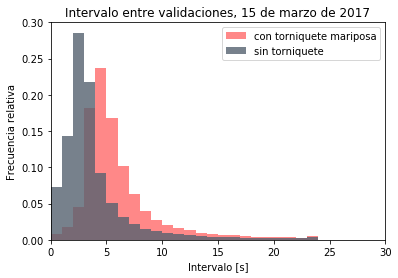

In [12]:
hist_fig, ax = plt.subplots()

plot1 = ax.hist(turns_vals,normed=True,bins=bins,color=colors[3], alpha=0.8, label='con torniquete mariposa')
plot2 = ax.hist(no_turns_vals,normed=True,bins=bins,color=colors[0], alpha = 0.8, label='sin torniquete')


ax.set_title('Intervalo entre validaciones, 15 de marzo de 2017')
ax.set_xlabel('Intervalo [s]')
ax.set_ylabel('Frecuencia relativa')
ax.set_xlim(0,30)
ax.legend()
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/2_daily_' + date + '.pdf')

In [13]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., n-1)
    return h, m-h, m, m+h

In [14]:
mean_confidence_interval(turnstile_97_df['diferencia_tiempo_secs'])

(0.023054187586336636,
 5.6195576979602517,
 5.6426118855465885,
 5.6656660731329254)

In [15]:
mean_confidence_interval(no_turnstile_97_df['diferencia_tiempo_secs'])

(0.0061526900928337951,
 3.4306764544814841,
 3.4368291445743178,
 3.4429818346671515)

#### Running the builder of the dataframe for date = 2017-08-23

In [16]:
date = '2017-08-23' #Last date, Wednesday
#Creating the object.
etapas_builder = DailyEtapasBuilder.RunSilentlyDailyEtapasBuilderClass(date)
#Building.
etapas_builder.loadSimplifiedEtapas()
etapas_builder.cleanDataFrame() #Be aware of this condition
etapas_builder.mergeTurnstileData()
etapas_builder.sortDataFrame()
etapas_builder.postProcessingSortedDataFrame()
#Retrieving the info.
etapas_df = etapas_builder.etapas_df
filtered_df = etapas_builder.filteringDf()[0]

TODO: Currently, there are rows with extremely high values for the 'diferencia_tiempo' attribute (e.g. >=25 mins). <strong>Be aware of this</strong>. <strike>This should be fixed considering the idExpedicion attribute present in the corresponding 'perfiles' database. The following graphs and descriptive statistics consider only the 95th percentile for the 'diferencia_tiempo_secs' attribute.</strike>

Filtering by diferencia_tiempo<=97th percentile in the  in the <strong>whole</strong> databases. <strong><font color="red">BE AWARE.</font></strong>

In [17]:
percentil_97 = filtered_df['diferencia_tiempo'].quantile(0.97)
print ('Percentile 97th for 2017-turnstile database is: ' + str(percentil_97))
percentil_97_df = filtered_df[filtered_df['diferencia_tiempo']<=percentil_97]

Percentile 97th for 2017-turnstile database is: 0 days 00:00:26


In [18]:
turnstile_97_df = percentil_97_df[percentil_97_df['torniquete_mariposa']==1]
no_turnstile_97_df = percentil_97_df[percentil_97_df['no_torniquete']==1]

In [19]:
turnstile_97_df.describe().round(3)

,id,nviaje,torniquete_mariposa,no_torniquete,diferencia_tiempo,diferencia_tiempo_secs
count,4.043730e+05,404373.000,404373.0,404373.0,404373,404373.000
mean,1.707572e+09,1.626,1.0,0.0,0 days 00:00:05.559337,5.559
std,1.416779e+09,0.859,0.0,0.0,0 days 00:00:03.785015,3.785
min,1.163274e+06,1.000,1.0,0.0,0 days 00:00:00,0.000
25%,4.148700e+08,1.000,1.0,0.0,0 days 00:00:03,3.000
50%,1.521784e+09,1.000,1.0,0.0,0 days 00:00:04,4.000
75%,3.071544e+09,2.000,1.0,0.0,0 days 00:00:06,6.000
max,4.293271e+09,13.000,1.0,0.0,0 days 00:00:26,26.000


In [20]:
no_turnstile_97_df.describe().round(3)

,id,nviaje,torniquete_mariposa,no_torniquete,diferencia_tiempo,diferencia_tiempo_secs
count,1.030770e+06,1030770.000,1030770.0,1030770.0,1030770,1030770.000
mean,1.754878e+09,1.663,0.0,1.0,0 days 00:00:03.511988,3.512
std,1.408982e+09,0.876,0.0,0.0,0 days 00:00:03.662275,3.662
min,1.163274e+06,1.000,0.0,1.0,0 days 00:00:00,0.000
25%,4.229699e+08,1.000,0.0,1.0,0 days 00:00:02,2.000
50%,1.666432e+09,1.000,0.0,1.0,0 days 00:00:03,3.000
75%,3.132472e+09,2.000,0.0,1.0,0 days 00:00:04,4.000
max,4.293295e+09,16.000,0.0,1.0,0 days 00:00:26,26.000


* Plotting

In [21]:
turns_vals = turnstile_97_df['diferencia_tiempo_secs'].values
no_turns_vals = no_turnstile_97_df['diferencia_tiempo_secs'].values
bins = range(0,int(percentil_97.total_seconds()),1)

In [22]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

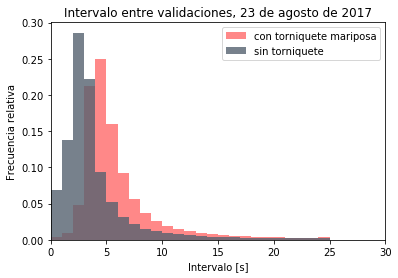

In [23]:
hist_fig, ax = plt.subplots()

plot1 = ax.hist(turns_vals,normed=True,bins=bins,color=colors[3], alpha=0.8, label='con torniquete mariposa')
plot2 = ax.hist(no_turns_vals,normed=True,bins=bins,color=colors[0], alpha = 0.8, label='sin torniquete')


ax.set_title('Intervalo entre validaciones, 23 de agosto de 2017')
ax.set_xlabel('Intervalo [s]')
ax.set_xlim(0,30)
ax.set_ylabel('Frecuencia relativa')
ax.legend()
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/2_daily_' + date + '.pdf')

In [24]:
import scipy as sp
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t.ppf((1+confidence)/2., n-1)
    return h, m-h, m, m+h

In [25]:
mean_confidence_interval(turnstile_97_df['diferencia_tiempo_secs'])

(0.011666107384770263,
 5.5476714349338314,
 5.5593375423186018,
 5.5710036497033721)

In [26]:
mean_confidence_interval(no_turnstile_97_df['diferencia_tiempo_secs'])

(0.0070699895032642944,
 3.5049181358787318,
 3.511988125381996,
 3.5190581148852602)

### Closed